## Testing mesa_h5 output


In [184]:
%pylab
from nugridpy import nugridse as se

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


With revision .... hdf5 files can be written and post-processed by mppnp. However, **there are some issues that need to be addressed**. 

1. The isotope abundances written into these files can not be read by nugridse, although initially at least the isotope names are available as `dcols`
2. Somehow the mesa output hdf5 files change after they have been used for mppnp postprocessing. Then neither data columns `dcols` nor cycle attributes `cattrs` are properly reported anymore.
3. one would think that one can make the mesa hdf5 output files read-only, but it is a long-known conundrum that these hdf5 files can not be opened and post-processesed if they are read-only. Weird. 
4. Although the mesa_h5 see output files seem to become unusable for nugridse they can still be post-processed ok by mppnp for a second time. 

In [171]:
### fresh hdf5 files as they come out of mesa_h5, not yet post-processed
see_fr=se.se("/user/mesa/mesa_h5_output_for_mppnp/HDF5_fresh")
### same hdf5 files, once post-processes
see_pp=se.se("/user/mesa/mesa_h5_output_for_mppnp/HDF5_post-processed")


Searching files, please wait.......
Writing preprocessor files
M3.00Z0.020.0000901.se.h5
M3.00Z0.020.0000601.se.h5
M3.00Z0.020.0000001.se.h5
M3.00Z0.020.0001101.se.h5
M3.00Z0.020.0000201.se.h5
M3.00Z0.020.0000701.se.h5
M3.00Z0.020.0000301.se.h5
M3.00Z0.020.0001001.se.h5
M3.00Z0.020.0000101.se.h5
M3.00Z0.020.0000801.se.h5
M3.00Z0.020.0000401.se.h5
M3.00Z0.020.0000501.se.h5
File search complete.
Searching files, please wait.......
Sorry, there is no A vector. This can cause problems for reading abundances. Continue...
Sorry, there is no Z vector. This can cause problems for reading abundances. Continue... 
Reading preprocessor files
File search complete.


In [162]:
### Issue 1
see_fr.se.isotopes[0:2]

['H-1', 'He-3']

In [163]:
# although there are name in the "fresh" files we can not get the data
see_fr.se.get(800,"H-1")

IndexError: list index out of range

In [160]:
# this is the return from the mppnp post-processing, this is how it should look like
# (this instance is initialized further down)
m2_ppd.se.get(800,"H-1")

 reading ['iso_massf']...100%

array([  7.80033910e-21,   7.79943012e-21,   7.79834793e-21, ...,
         7.19227390e-01,   7.19227390e-01,   7.19227390e-01])

In [161]:
# after the mesa se files have been post-processed it appears the do not 
# have see same isotopes names anymore
see_pp.se.isotopes[0:2]

['H-1', 'H-2m1.0']

In [152]:
### Issue 2: this is how the cycle attributes should look like
see_fr.se.cattrs[0:3]

['model_number', 'age', 'total_mass']

In [150]:
# instead, when the se files have been touched for post-processing nugridse can not see the 
# cycle attributes an
see_pp.se.cattrs

[]

In [180]:
see_fr.se.get('codev')

b'some/string/in/your/data'

In [181]:
see_fr.se.hattrs[0:4]

['icyclenb', 'firstcycle', 'OMP_NUM_THREADS', 'MESA_version']

In [182]:
total_mass=see_fr.se.get('total_mass')

 reading ['total_mass']...143%

In [121]:
see_fr.se.get?

In [52]:
# checking if there are names used in both history and profiles_columns.list files
# see https://github.com/NuGrid/mesa_h5/issues/5
for otherthing in see.se.cattrs:
    [print(thing) for thing in see.se.dcols if otherthing in thing]

In [83]:
# finding something in lost of variables contained in the cattrs or dcols
otherthing = 'del'
[print(thing) for thing in see.se.cattrs if otherthing in thing]

model_number
deltat


[None, None]

<IPython.core.display.Javascript object>


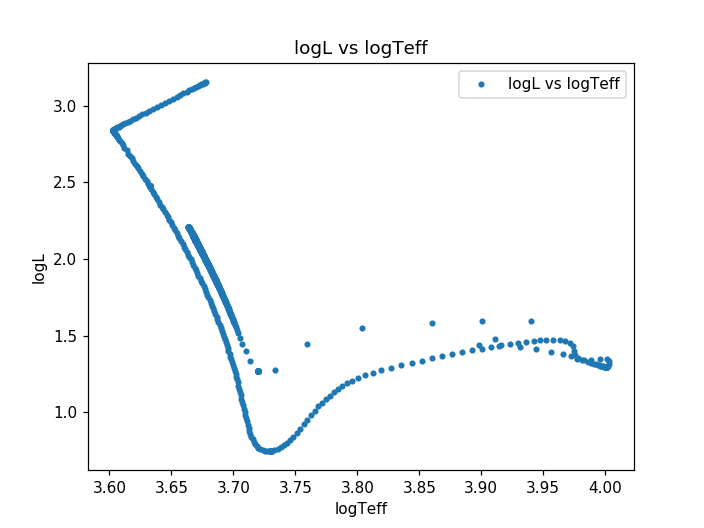

 reading ['logTeff']...143%5.832741022109985


In [179]:
# test plotting cycle attributes
# issue C: sparse option is not recognized
# this is a NuGridPy issue
close(111);figure(111)
see_fr.plot('logTeff','logL')

<IPython.core.display.Javascript object>


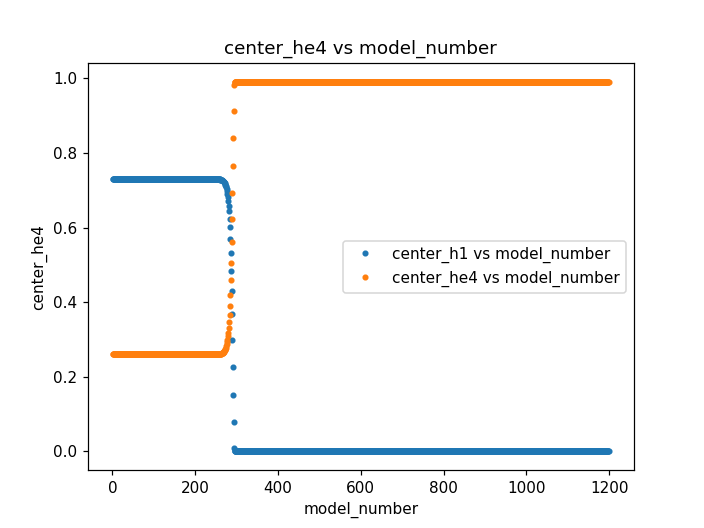

 reading ['model_number']...143%6.708245515823364
 reading ['model_number']...143%5.604676723480225


In [178]:
# test plotting cycle attributes
# issue: sparse option is not recognized
ifig=113;close(ifig);figure(ifig)
see_fr.plot('model_number','center_h1')
see_fr.plot('model_number','center_he4')

<IPython.core.display.Javascript object>


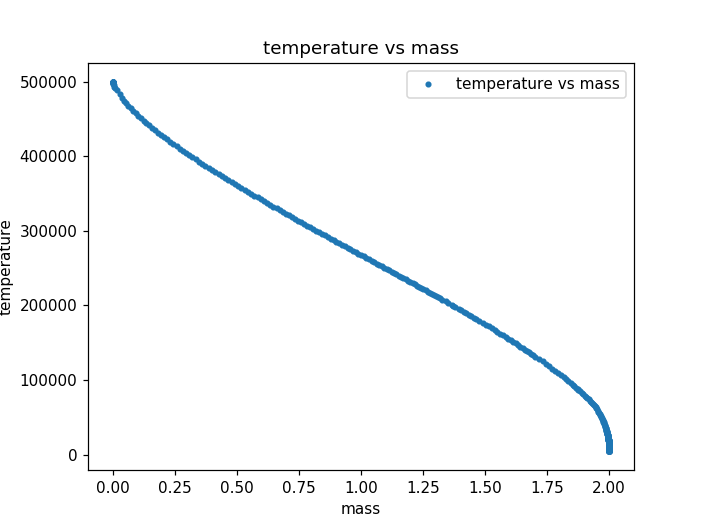

 reading ['mass']...200%0.019824504852294922


In [177]:
figure(112)
see_fr.plot('mass','temperature',fname=100)

## Comparing post-processed files with mesa profiles
We are comparing the post-processed files with MESA profiles. Because of the problems identifies above we are not able to plot the MESA profiles from the new mesa_h5 output files, but instead use the old mesa profiles.

In [165]:
m2_ppd=se.se('/user/NuGrid/NuPPN/examples/mppnp_h5mesa/H5_out')

Searching files, please wait.......
Reading preprocessor files
File search complete.


<IPython.core.display.Javascript object>


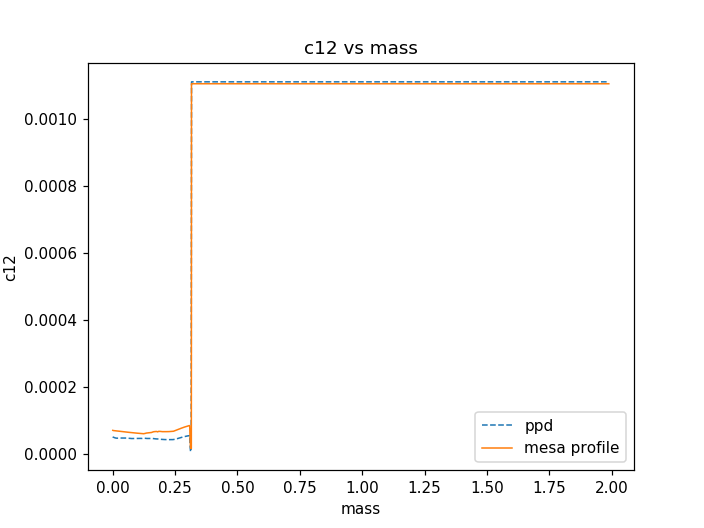

 reading ['mass']...100%0.09744715690612793


In [166]:
close(210);figure(210)
m2_ppd.plot('mass','C-12',fname=900,legend='ppd',shape='--')

In [167]:
from nugridpy import mesa as ms

In [169]:
m2_see_prof=ms.mesa_profile('/user/mesa/mesa_h5_output_for_mppnp/LOGS',900)

28 in profiles.index file ...
Found and load nearest profile for cycle 900
reading /user/mesa/mesa_h5_output_for_mppnp/LOGS/profile22.data ...
 reading ...100% 

Closing profile tool ...


In [134]:
m2_see_prof.log_ind

{1: 1,
 50: 2,
 100: 3,
 150: 4,
 200: 5,
 250: 6,
 264: 7,
 290: 8,
 296: 9,
 300: 10,
 350: 11,
 400: 12,
 450: 13,
 500: 14,
 550: 15,
 600: 16,
 650: 17,
 700: 18,
 750: 19,
 800: 20,
 850: 21,
 900: 22,
 950: 23,
 1000: 24,
 1050: 25,
 1100: 26,
 1150: 27,
 1200: 28}

In [170]:
figure(210)
m2_see_prof.plot('mass','c12',legend='mesa profile',shape='-')
legend(loc=0)